**Task-1: Regression Model for House Prices**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Impporting the Data

In [3]:
HouseDF = pd.read_csv('/content/drive/MyDrive/HousePricePrediction/Updated_USA_Housing.csv')


Showing the Data

In [4]:
HouseDF.head()
HouseDF.info()
HouseDF.describe()
HouseDF.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Avg. Income               5000 non-null   float64
 1   Avg. House Age            5000 non-null   float64
 2   Avg. Number of Bedrooms   5000 non-null   float64
 3   Avg. Number of Bathrooms  5000 non-null   float64
 4   Area Population           5000 non-null   float64
 5   Price                     5000 non-null   float64
 6   SqFt                      5000 non-null   float64
dtypes: float64(7)
memory usage: 273.6 KB


Index(['Avg. Income', 'Avg. House Age', 'Avg. Number of Bedrooms',
       'Avg. Number of Bathrooms', 'Area Population', 'Price', 'SqFt'],
      dtype='object')

Loading and Training the Model

In [5]:

#X = HouseDF[['Avg. Income', 'Avg. House Age', 'Avg. Number of Bedrooms', 'Avg. Number of Bathrooms', 'Area Population', 'SqFt']]
X = HouseDF[['Avg. Income', 'Avg. House Age', 'Avg. Number of Bedrooms', 'Avg. Number of Bathrooms', 'SqFt']]

y = HouseDF['Price']

Spliting the Dataset into Test and Train

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)



LinearRegression()

In [7]:
print(lm.intercept_)

-2092411.0565469956


In [8]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Income,21.264172
Avg. House Age,163791.156027
Avg. Number of Bedrooms,116356.612516
Avg. Number of Bathrooms,-5014.732523
SqFt,34.030813


Predictions

In [9]:
predictions = lm.predict(X_test)

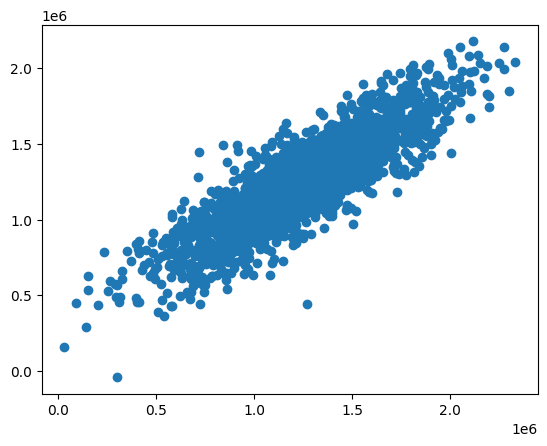

In [10]:
plt.scatter(y_test,predictions)

<ipython-input-11-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


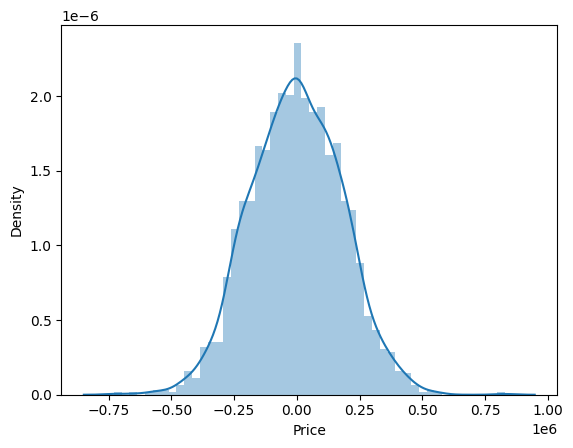

In [11]:
sns.distplot((y_test-predictions),bins=50);

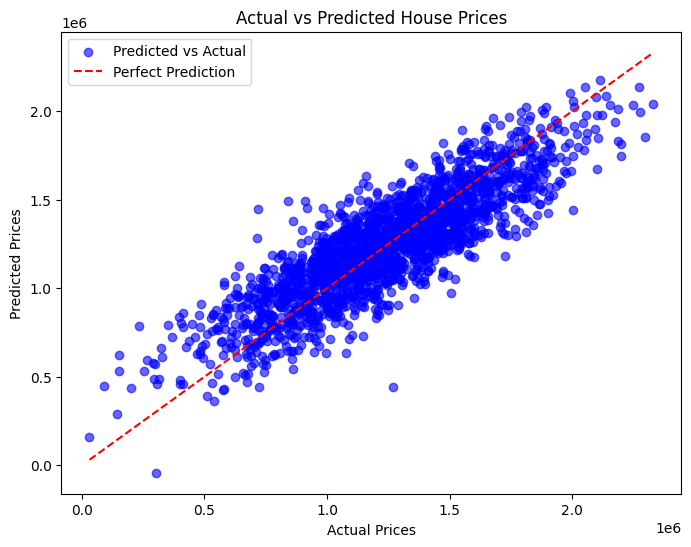

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


Metrics

In [13]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
r2 = r2_score(y_test, predictions)
print("R² Score:", r2)

MAE: 145762.61230178527
MSE: 33095454910.617813
RMSE: 181921.56252247235
R² Score: 0.7395708738256428
